# Two energy surfaces in equilibrium


## Initialize the energy surfaces

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import math as math
from math import pi
import matplotlib.pyplot as plt
import matrix_formalism

dx = 0.1
kT = 10
q = np.arange(0, 2*pi, dx)
bins = len(q)

binned_surface_A = 100*np.cos(q)
#binned_surface_B = np.cos(q + pi)
binned_surface_B = matrix_formalism.energy(q)
energy_delta = binned_surface_B - binned_surface_A

print('Created two energy landscapes with {} bins each using dx = {}.'.format(bins, dx))

Created two energy landscapes with 63 bins each using dx = 0.1.


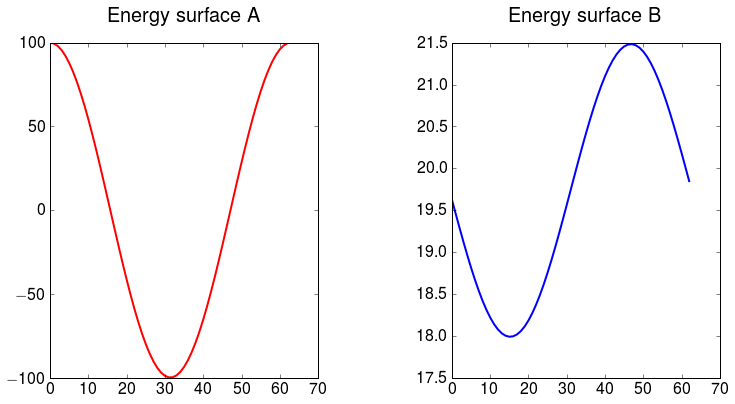

In [2]:
fig, gs, axes = matrix_formalism.generate_axes_pad(nrows=1, ncols=2, h_pad=0.5, v_pad=0.5, figsize=(12,6))
ax = axes[0][0]
ax.plot(range(bins), binned_surface_A, c='r', lw=2)
ax.set_title('Energy surface A', y=1.05)
ax = axes[0][1]
ax.plot(range(bins), binned_surface_B, c='b', lw=2)
ax.set_title('Energy surface B', y=1.05)
plt.show()

## Calculate the rate matrix for moving along each energy surface according to Boltzmann

In [3]:
rate_matrix_A = matrix_formalism.setup_rate_matrix(binned_surface_A, kT)
rate_matrix_B = matrix_formalism.setup_rate_matrix(binned_surface_B, kT)

## Calculate the transition matrix for moving ***between*** energy surfaces

In [4]:
prefactors = [1]
print('Scanning through {} prefactors for transitions between the two surfaces.'.format(len(prefactors)))

Scanning through 1 prefactors for transitions between the two surfaces.


In [5]:
# for clr, C in zip(color_idx, prefactors):
#     transition_matrix = matrix_formalism.setup_transition_matrix(
#         rate_matrix_A,
#         rate_matrix_B,
#         energy_delta,
#         kT,
#         prefactor=C)
    
#     eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
#     print('Maximum eigenvalue = {}'.format(eigenvalues[eigenvalues.argmax()]))
#     eigenvector_for_one = eigenvectors[:,eigenvalues.argmax()].astype(float)

#     ax = axes[0][0]
#     ax.plot(range(bins), abs(eigenvectors[:,eigenvalues.argmax()][bins:2*bins])/sum(abs(eigenvectors[:,eigenvalues.argmax()][bins:2*bins])*dx), c=plt.cm.jet(clr), lw=2, label='{}'.format(C))
#     ax.legend()
#     ax = axes[0][1]
#     ax.plot(range(bins), abs(eigenvectors[:,eigenvalues.argmax()][0:bins])/sum(abs(eigenvectors[:,eigenvalues.argmax()][0:bins])*dx), c=plt.cm.jet(clr), lw=2, label='{}'.format(C))
#     ax.legend()

transition_matrix = matrix_formalism.setup_transition_matrix(
    rate_matrix_A,
    rate_matrix_B,
    energy_delta,
    kT,
    prefactor=prefactors[0])

Transition matrix computed with C = 1, dt = 0.001


## Calculate the eigenvalues and the eigenvectors of the transition matrix

SANITY CHECKS
##########################################################
0 -> 62 = 	0.00101743984367
0 -> 0 = 	0.942321333421
0 -> 1 = 	0.00102529376713
A -> B = 	0.0556359329679
Energy A[0] = 	100.0
Energy B[0] = 	19.6234146218
Maximum eigenvalue = 1.0
###########################################################


/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


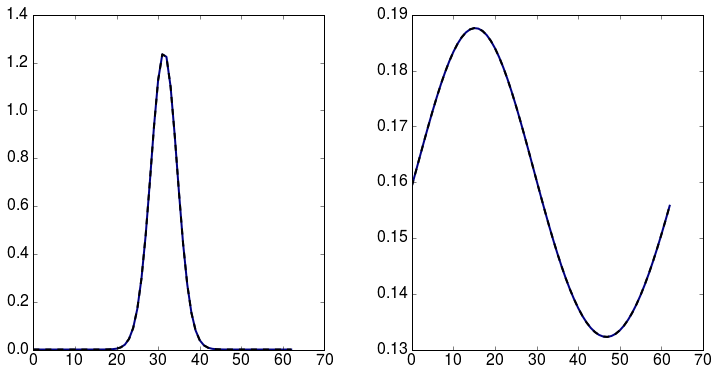

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
print('SANITY CHECKS')
print('##########################################################')
print('0 -> {} = \t{}'.format(bins-1, transition_matrix[0][bins-1]))
print('0 -> 0 = \t{}'.format(transition_matrix[0][0]))
print('0 -> 1 = \t{}'.format(transition_matrix[0][1]))
print('A -> B = \t{}'.format(transition_matrix[0][bins]))
print('Energy A[0] = \t{}'.format(binned_surface_A[0]))
print('Energy B[0] = \t{}'.format(binned_surface_B[0]))
print('Maximum eigenvalue = {}'.format(eigenvalues[eigenvalues.argmax()]))
print('###########################################################')
eigenvector_for_one = eigenvectors[:,eigenvalues.argmax()].astype(float)
fig, gs, axes = matrix_formalism.generate_axes_pad(nrows=1, ncols=2, h_pad=0.3, v_pad=0.3, figsize=(12,6))

ax = axes[0][0]
ax.plot(range(bins), abs(eigenvectors[:,eigenvalues.argmax()][0:bins])/sum(abs(eigenvectors[:,eigenvalues.argmax()][0:bins])*dx), c=plt.cm.jet(0), lw=2)
ax.legend()
ax = axes[0][1]
ax.plot(range(bins), abs(eigenvectors[:,eigenvalues.argmax()][bins:2*bins])/sum(abs(eigenvectors[:,eigenvalues.argmax()][bins:2*bins])*dx), c=plt.cm.jet(0), lw=2)
ax.legend()
ax = axes[0][0]
ax.plot(range(bins), np.exp(-binned_surface_A/(kT))/sum(np.exp(-binned_surface_A/(kT))*dx), c='k', lw=2, ls='--', label='Boltzmann PDF')
ax = axes[0][1]
ax.plot(range(bins), np.exp(-binned_surface_B/(kT))/sum(np.exp(-binned_surface_B/(kT))*dx), c='k', lw=2, ls='--', label='Boltzmann PDF')
plt.show()

In [7]:
# Interrogate all the eigenvectors (don't enable unless you have a free afternoon; will take a ton of time)

# for i in range(2*bins):
#     plt.figure()
#     plt.plot(range(2*bins), eigenvectors[:,i])
#     plt.title('E-vector {}, E-value {}'.format(i, eigenvalues[i]))
#     plt.ylim([-0.5, 0.5])
#     plt.savefig('eigenvector_{0:03d}.png'.format(i))

In [7]:
# num = 11
# import matplotlib.gridspec as gridspec
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(16, 12))
# inner_grid = gridspec.GridSpec(4, 3, wspace=0.5, hspace=0.5)
# for j in range(num):
#     ax = plt.Subplot(fig, inner_grid[j])
#     ax.plot(range(len(eigenvectors[:,j])), abs(eigenvectors[:,j])/sum(abs(eigenvectors[:,j])), c='b', lw=2)
#     ax.plot(range(bins), np.exp(-binned_surface_A/(kT))/sum(np.exp(-binned_surface_A/(kT))), c='k', lw=2, ls='--', label='Boltzmann PDF')
#     ax.plot(range(bins,2*bins), np.exp(-binned_surface_B/(kT))/sum(np.exp(-binned_surface_B/(kT))), c='k', lw=2, ls='--', label='Boltzmann PDF')     
#     fig.add_subplot(ax)
#     ax.set_xlim([0, 2*bins])
#     ax.set_ylim([0, 0.5])
#     ax.set_xticks([0, bins, 2*bins])
#     ax.set_yticks([0, 0.5])

#     ax.set_title('{}'.format(eigenvalues[j].astype(float)))
# ax = plt.Subplot(fig, inner_grid[11])
# ax.plot(range(len(eigenvectors[:,eigenvalues.argmax()])), abs(eigenvectors[:,eigenvalues.argmax()])/sum(abs(eigenvectors[:,eigenvalues.argmax()])), c='r', lw=2)
# ax.plot(range(bins), np.exp(-binned_surface_A/(kT))/sum(np.exp(-binned_surface_A/(kT))), c='k', lw=2, ls='--', label='Boltzmann PDF')
# ax.plot(range(bins,2*bins), np.exp(-binned_surface_B/(kT))/sum(np.exp(-binned_surface_B/(kT))), c='k', lw=2, ls='--', label='Boltzmann PDF')     
# fig.add_subplot(ax)
# ax.set_xlim([0, 2*bins])
# ax.set_ylim([0, 0.5])
# ax.set_xticks([0, bins, 2*bins])
# ax.set_yticks([0, 0.5])
# ax.set_title('{}'.format(eigenvalues[eigenvalues.argmax()].astype(float)))
# plt.show()

## Test that the evolution of a random population reaches the steady state population

Initial random population
[ 0.01302946  0.00065261  0.00369676  0.01453108  0.01248309  0.01582716
  0.00728321  0.00907745  0.00183113  0.00903729  0.01101164  0.00719179
  0.00992243  0.00735714  0.01458663  0.01331353  0.00760222  0.0004646
  0.00494006  0.00370926  0.00565371  0.00259183  0.00198846  0.00116355
  0.0124731   0.00699267  0.01403475  0.0062598   0.01189963  0.00397904
  0.01198573  0.0072669   0.01414788  0.00586805  0.01077288  0.0046329
  0.0153631   0.00537478  0.01490445  0.01188038  0.00302706  0.00058353
  0.00637244  0.00832777  0.0157336   0.00553427  0.01378535  0.00941119
  0.00490801  0.00047024  0.01680538  0.00527787  0.00334445  0.00572295
  0.00519826  0.00432996  0.00100506  0.01142929  0.01284589  0.00792057
  0.00753081  0.0125917   0.00412775  0.00330653  0.01520269  0.0112806
  0.0018921   0.01194778  0.00142421  0.01290349  0.00431044  0.01086225
  0.01620181  0.00885528  0.0095362   0.01673532  0.01200067  0.01460253
  0.01517946  0.01066672  0.

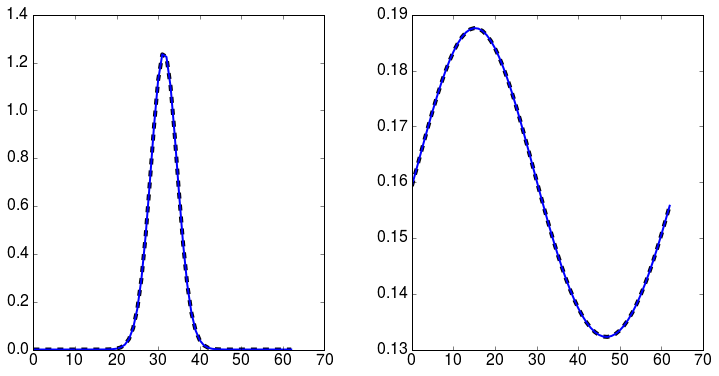

In [8]:
population = np.random.rand(2*bins)
row_sums = population.sum(axis=0, keepdims=True)
population = population / row_sums
iterations = 0
print 'Initial random population'
print population
diff = []
new_population = population


# The more bins in the energy landscape, the more iterations we need to run until convergence.

for i in range(10000000):
    new_population = np.dot(new_population, transition_matrix)
print('Final population')
print(new_population)

fig, gs, axes = matrix_formalism.generate_axes_pad(nrows=1, ncols=2, h_pad=0.3, v_pad=0.3, figsize=(12,6))

ax = axes[0][0]
ax.plot(range(bins), np.exp(-binned_surface_A/(kT))/sum(np.exp(-binned_surface_A/(kT))*dx), c='k', lw=4, ls='--', label='Boltzmann PDF')
ax.plot(range(bins), new_population[0:bins]/sum(new_population[0:bins]*dx), c='b', lw=2, label='Population')
ax = axes[0][1]
ax.plot(range(bins), np.exp(-binned_surface_B/(kT))/sum(np.exp(-binned_surface_B/(kT))*dx), c='k', lw=4, ls='--', label='Boltzmann PDF')
ax.plot(range(bins), new_population[bins:2*bins]/sum(new_population[bins:2*bins]*dx), c='b', lw=2, label='Population')
plt.show()


## Metropolis Monte Carlo on the surfaces as a check

In [9]:
positions  = []
x, surface = 0, 0
accept = []

for i in range(10000000):
    candidate = x + np.random.randint(-5, 5)
    if candidate >= bins:
        candidate -= bins
    elif candidate < 0:
        candidate += bins
    if surface == 0:
        E_now  = binned_surface_A[x]
        E_step = binned_surface_A[candidate]
    if surface == 1:
        E_now  = binned_surface_B[x]
        E_step = binned_surface_B[candidate]
    delta = E_step - E_now
    if (delta < 0):
        x = candidate
        positions.append([x, surface])
    else:
        p_accept = np.exp(-delta/kT)
        r = np.random.random()
        if (p_accept > r):
            x = candidate
            positions.append([x, surface])
            accept.append(1)
        accept.append(0)

    if surface == 0:
        E_now    = binned_surface_A[x]
        E_switch = binned_surface_B[x]
    if surface == 1:
        E_now    = binned_surface_B[x]
        E_switch = binned_surface_A[x]
    delta = E_switch - E_now
    if (delta < 0):
        surface = (surface + 1) % 2
        positions.append([x, surface])
    else:
        p_accept = np.exp(-delta/kT)
        r = np.random.random()
        if (p_accept > r):
            surface = (surface + 1) % 2
            positions.append([x, surface])
            accept.append(1)
        accept.append(0)

positions_A = [positions[row][0] for row in range(len(positions)) if positions[row][1] == 0]
positions_B = [positions[row][0] for row in range(len(positions)) if positions[row][1] == 1]

## Plot the results of Metropolis Monte Carlo

MC acceptance ratio (both steps and surface switches) = 0.187690215737


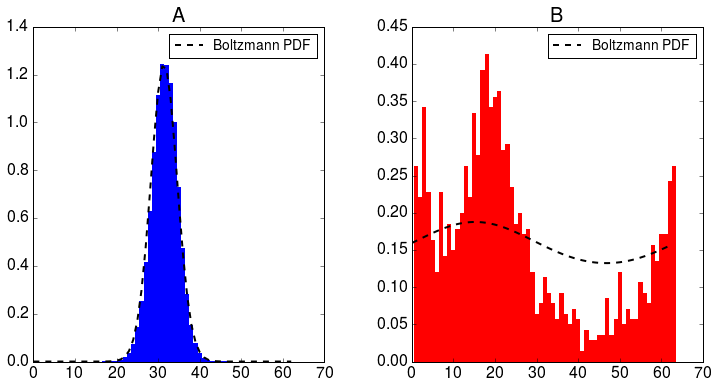

In [10]:
print('MC acceptance ratio (both steps and surface switches) = {}'.format(float(sum(accept))/len(accept)))

fig, gs, axes = matrix_formalism.generate_axes_pad(nrows=1, ncols=2, h_pad=0.3, v_pad=0.3, figsize=(12,6))
counts, edges = np.histogram(positions_A, range=(0, bins), bins=bins, density=False)
mids          = (edges[1:] + edges[:-1]) / 2.
ax = axes[0][0]
ax.bar(mids, counts/(sum(counts)*dx), color='b', edgecolor='none', width=mids[1] - mids[0])
ax.plot(range(bins), 
         np.exp(-binned_surface_A/(kT))
         /sum(np.exp(-binned_surface_A/(kT))*dx), c='k', lw=2, ls='--', label='Boltzmann PDF')
ax.set_title('A')
ax.legend()
counts, edges = np.histogram(positions_B, range=(0, bins), bins=bins, density=False)
mids          = (edges[1:] + edges[:-1]) / 2.
ax = axes[0][1]
ax.bar(mids, counts/(sum(counts)*dx), color='r', edgecolor='none', width=mids[1] - mids[0])
ax.plot(range(bins), 
         np.exp(-binned_surface_B/(kT))
         /sum(np.exp(-binned_surface_B/(kT))*dx), c='k', lw=2, ls='--', label='Boltzmann PDF')
ax.set_title('B')
ax.legend()
plt.show()

## Calculate flux out of and into a single bin

In [39]:
print range(0, len(eigenvectors[:,eigenvalues.argmax()])/2)
print range(len(eigenvectors[:,eigenvalues.argmax()])/2, len(eigenvectors[:,eigenvalues.argmax()]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
[63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125]


In [79]:
fluxes = matrix_formalism.calculate_flux(eigenvectors[:,eigenvalues.argmax()], transition_matrix)

Bins = 63


In [76]:
transition_matrix[65][64]

0.00099164530492773474

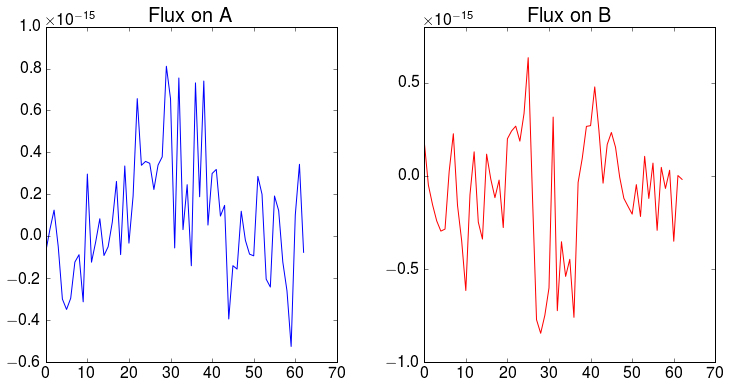

In [80]:
fig, gs, axes = matrix_formalism.generate_axes_pad(nrows=1, ncols=2, h_pad=0.3, v_pad=0.3, figsize=(12,6))
ax = axes[0][0]
ax.plot(range(bins), fluxes[0:bins], color='b')
ax.set_title('Flux on A')
ax.legend()
ax = axes[0][1]
ax.plot(range(bins), fluxes[bins:2*bins], color='r')
ax.set_title('Flux on B')
ax.legend()
plt.show()

## Transtion probability to swap surfaces = 0

Transition matrix computed with C = 0.0, dt = 0.1
Unexpected number of nonzero entries in the transition matrix.
[ 0.79997246  0.100025    0.         ...,  0.          0.          0.        ]
0 -> Last = 	0.100002536575
0 -> 0 = 	0.799972460508
0 -> 1 = 	0.100025002917
A -> B = 	0.0
Energy A[0] = 	100.0
Energy B[0] = 	19.6222941556
Maximum eigenvalue = 1.0


/home/dslochower/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:23: RuntimeWarning: invalid value encountered in divide


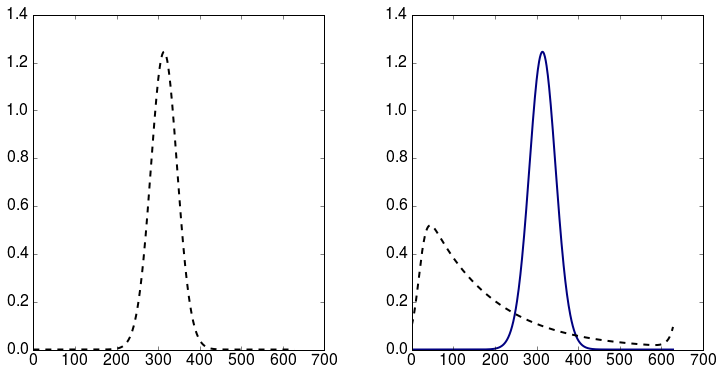

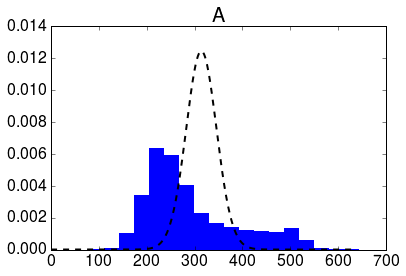

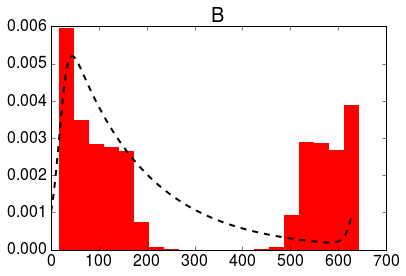

In [15]:

transition_matrix = matrix_formalism.setup_transition_matrix(
    rate_matrix_A,
    rate_matrix_B,
    energy_delta,
    kT,
    prefactor=0.0)
    

eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
print('0 -> Last = \t{}'.format(transition_matrix[0][bins-1]))
print('0 -> 0 = \t{}'.format(transition_matrix[0][0]))
print('0 -> 1 = \t{}'.format(transition_matrix[0][1]))
print('A -> B = \t{}'.format(transition_matrix[0][bins]))
print('Energy A[0] = \t{}'.format(binned_surface_A[0]))
print('Energy B[0] = \t{}'.format(binned_surface_B[0]))

print('Maximum eigenvalue = {}'.format(eigenvalues[eigenvalues.argmax()]))
eigenvector_for_one = eigenvectors[:,eigenvalues.argmax()].astype(float)
fig, gs, axes = matrix_formalism.generate_axes_pad(nrows=1, ncols=2, h_pad=0.3, v_pad=0.3, figsize=(12,6))

ax = axes[0][0]
ax.plot(range(bins), abs(eigenvectors[:,eigenvalues.argmax()][bins:2*bins])/sum(abs(eigenvectors[:,eigenvalues.argmax()][bins:2*bins])*dx), c=plt.cm.jet(0), lw=2)
ax.legend()
ax = axes[0][1]
ax.plot(range(bins), abs(eigenvectors[:,eigenvalues.argmax()][0:bins])/sum(abs(eigenvectors[:,eigenvalues.argmax()][0:bins])*dx), c=plt.cm.jet(0), lw=2)
ax.legend()



ax = axes[0][0]
ax.plot(range(bins), np.exp(-binned_surface_A/(kT))/sum(np.exp(-binned_surface_A/(kT))*dx), c='k', lw=2, ls='--', label='Boltzmann PDF')
ax = axes[0][1]
ax.plot(range(bins), np.exp(-binned_surface_B/(kT))/sum(np.exp(-binned_surface_B/(kT))*dx), c='k', lw=2, ls='--', label='Boltzmann PDF')
plt.show()



positions_A =[]    # AKA surface 0
positions_B = []   # AKA surface 1
x = 0
surface = 0

for i in range(10000000):  

    new_x = x + np.random.randint(-5, 5)
    if new_x >= bins:
        #print('new_x moving from {} to {}'.format(new_x, new_x - bins))
        new_x = 0 + (new_x - bins)
    elif new_x < 0:
        new_x = bins - abs(new_x - 0)
    if surface == 0:
        E_step = binned_surface_A[new_x]
        E_now  = binned_surface_A[x]
    if surface == 1:
        E_step = binned_surface_B[new_x]
        E_now  = binned_surface_B[x]
    delta = E_step - E_now
    if (delta < 0):
        if surface == 0:
            positions_A.append(new_x)
        if surface == 1:
            positions_B.append(new_x)
        x = new_x
    if (delta >= 0):
        p_accept = np.exp(-delta/kT)
        r = np.random.random()
        if (p_accept > r):
            if surface == 0:
                positions_A.append(new_x)
            if surface == 1:
                positions_B.append(new_x)
            x = new_x
    else:
        if surface == 0:
            positions_A.append(x)
        if surface == 1:
            positions_B.append(x)
        x = new_x
            
            
    if surface == 0:
        E_switch = binned_surface_B[new_x]
    if surface == 1:
        E_switch = binned_surface_A[new_x]
    delta = E_switch - E_now
    if (delta < 0):
        if surface == 0:
            positions_B.append(new_x)
            surface = (surface + 1)%2
            #print 'A to B delta'
            #print surface
        else:
            positions_A.append(new_x)
            surface = (surface + 1)%2
            #print 'B to A delta'
        x = new_x
    if (delta >= 0):
        p_accept = np.exp(-delta/kT)
        r = np.random.random()
        if (p_accept > r):
            if surface == 0:
                positions_B.append(new_x)
                #print surface
                surface = (surface + 1)%2
                #print 'A to B random'
                #print surface
            else:
                positions_A.append(new_x)
                surface = (surface + 1)%2
                #print 'B to A random'
            x = new_x
    else:
        if surface == 0:
            positions_A.append(x)
        if surface == 1:
            positions_B.append(x)
        x = new_x
        
        
        
plt.figure()
counts, edges = np.histogram(positions_A, range=(0, bins),
              bins=20, density=True)
mids = (edges[1:] + edges[:-1]) / 2.
plt.bar(mids, counts, color='b', edgecolor='none',
           width=mids[1] - mids[0])
plt.plot(range(bins), 
         np.exp(-binned_surface_A/(kT))
         /sum(np.exp(-binned_surface_A/(kT)))
         , c='k', lw=2, ls='--', label='Boltzmann PDF')
plt.title('A')
plt.show()
plt.figure()
counts, edges = np.histogram(positions_B, range=(0, bins),
              bins=20, density=True)
mids = (edges[1:] + edges[:-1]) / 2.
plt.bar(mids, counts, color='r', edgecolor='none',
           width=mids[1] - mids[0])
plt.plot(range(bins), 
         np.exp(-binned_surface_B/(kT))
         /sum(np.exp(-binned_surface_B/(kT))), 
         c='k', lw=2, ls='--', label='Boltzmann PDF')
plt.title('B')
plt.show()

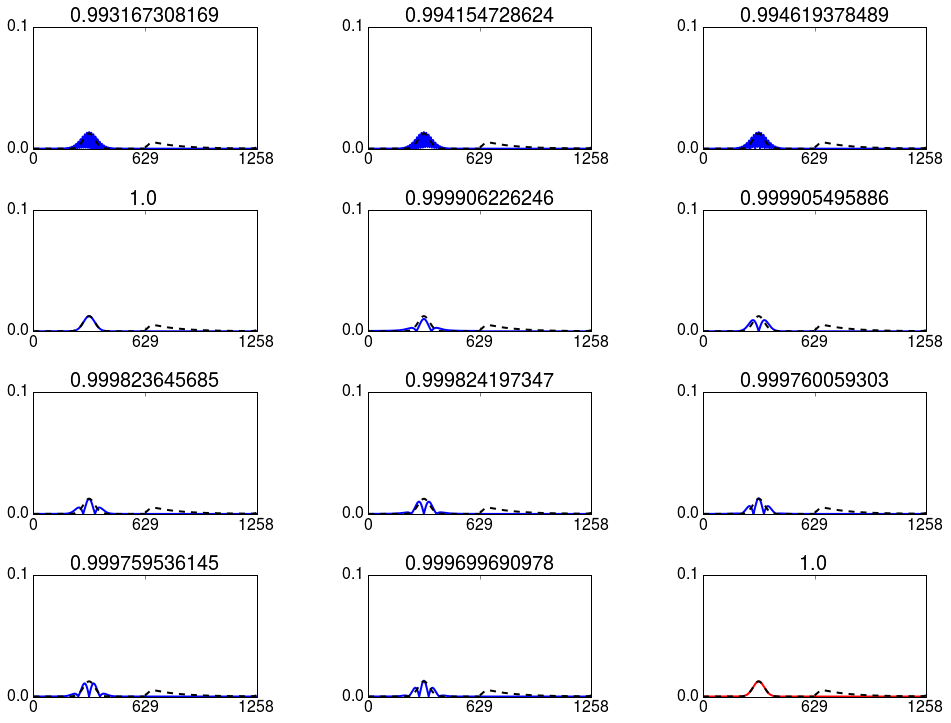

In [16]:
num = 11
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 12))
inner_grid = gridspec.GridSpec(4, 3, wspace=0.5, hspace=0.5)
for j in range(num):
    ax = plt.Subplot(fig, inner_grid[j])
    ax.plot(range(len(eigenvectors[:,j])), abs(eigenvectors[:,j])/sum(abs(eigenvectors[:,j])), c='b', lw=2)
    ax.plot(range(bins), np.exp(-binned_surface_A/(kT))/sum(np.exp(-binned_surface_A/(kT))), c='k', lw=2, ls='--', label='Boltzmann PDF')
    ax.plot(range(bins,2*bins), np.exp(-binned_surface_B/(kT))/sum(np.exp(-binned_surface_B/(kT))), c='k', lw=2, ls='--', label='Boltzmann PDF')     
    fig.add_subplot(ax)
    ax.set_xlim([0, 2*bins])
    ax.set_ylim([0, 0.1])
    ax.set_xticks([0, bins, 2*bins])
    ax.set_yticks([0, 0.1])

    ax.set_title('{}'.format(eigenvalues[j].astype(float)))
ax = plt.Subplot(fig, inner_grid[11])
ax.plot(range(len(eigenvectors[:,eigenvalues.argmax()])), abs(eigenvectors[:,eigenvalues.argmax()])/sum(abs(eigenvectors[:,eigenvalues.argmax()])), c='r', lw=2)
ax.plot(range(bins), np.exp(-binned_surface_A/(kT))/sum(np.exp(-binned_surface_A/(kT))), c='k', lw=2, ls='--', label='Boltzmann PDF')
ax.plot(range(bins,2*bins), np.exp(-binned_surface_B/(kT))/sum(np.exp(-binned_surface_B/(kT))), c='k', lw=2, ls='--', label='Boltzmann PDF')     
fig.add_subplot(ax)
ax.set_xlim([0, 2*bins])
ax.set_ylim([0, 0.1])
ax.set_xticks([0, bins, 2*bins])
ax.set_yticks([0, 0.1])
ax.set_title('{}'.format(eigenvalues[eigenvalues.argmax()].astype(float)))
plt.show()